In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_csv("preprocessed_customer_booking.csv", encoding='latin1')
data.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0
5,1,0,2,3,48,20,4,0,61,1,0,1,5.52,0
6,3,0,2,201,33,6,4,0,61,1,0,1,5.52,0
7,2,0,2,238,19,14,1,0,36,1,0,1,5.52,0
8,1,0,2,80,22,4,1,0,61,0,0,1,5.52,0
9,2,0,2,185,25,14,5,0,100,1,1,1,5.52,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46477 entries, 0 to 46476
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         46477 non-null  int64  
 1   sales_channel          46477 non-null  int64  
 2   trip_type              46477 non-null  int64  
 3   purchase_lead          46477 non-null  int64  
 4   length_of_stay         46477 non-null  int64  
 5   flight_hour            46477 non-null  int64  
 6   flight_day             46477 non-null  int64  
 7   route                  46477 non-null  int64  
 8   booking_origin         46477 non-null  int64  
 9   wants_extra_baggage    46477 non-null  int64  
 10  wants_preferred_seat   46477 non-null  int64  
 11  wants_in_flight_meals  46477 non-null  int64  
 12  flight_duration        46477 non-null  float64
 13  booking_complete       46477 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 5.0 MB


In [ ]:
# Select relevant features
features = data[['length_of_stay', 'purchase_lead']]

In [ ]:
# Remove missing values
features = features.dropna()

In [ ]:
# Remove outliers
q_low = features.quantile(0.01)
q_hi  = features.quantile(0.99)
filtered_features = features[(features >= q_low) & (features <= q_hi)].dropna()

In [ ]:
# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(filtered_features)

In [ ]:
# Elbow method to find the optimal number of clusters
inertia = []
sil_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(scaled_features, kmeans.labels_))

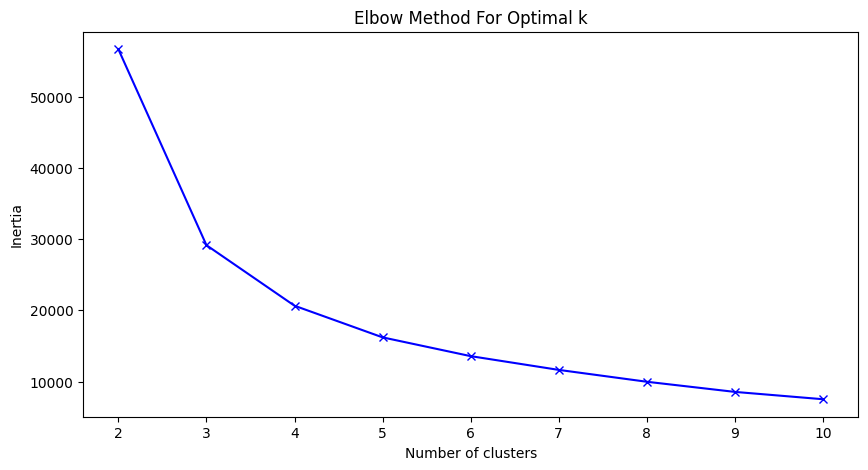

In [ ]:
# Plot the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

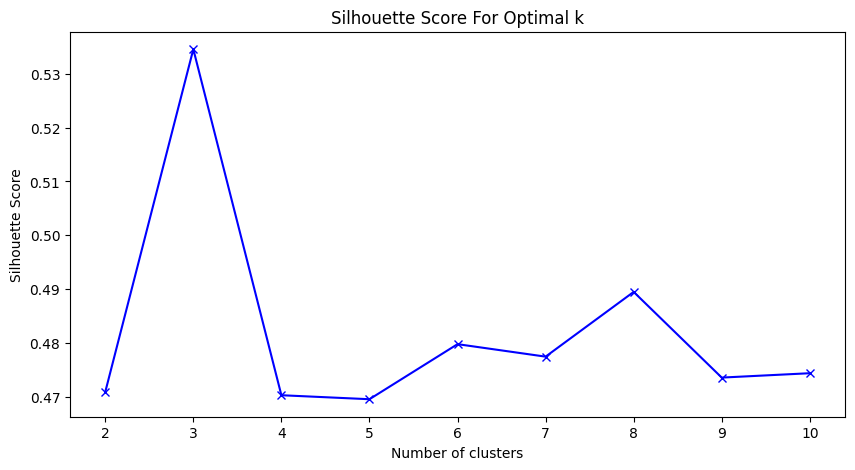

In [ ]:
# Plot Silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(K, sil_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()

In [ ]:
# Choose the optimal k based on the silhouette score
optimal_k = K[sil_scores.index(max(sil_scores))]
print(f'The optimal number of clusters is {optimal_k}')

The optimal number of clusters is 3


In [ ]:
# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300)
kmeans.fit(scaled_features)
labels = kmeans.labels_

In [ ]:
# Calculate the final silhouette score
final_sil_score = silhouette_score(scaled_features, labels)
print(f'Final Silhouette Score: {final_sil_score}')

Final Silhouette Score: 0.5345140579562564


In [ ]:
# Memilih kolom ke-4 dan kolom ke-5
data_clus = data.iloc[:, [3, 4]]

# Menampilkan 5 baris pertama dari kolom yang dipilih
print(data_clus.head(5))

   purchase_lead  length_of_stay
0            262              19
1            112              20
2            243              22
3             96              31
4             68              22


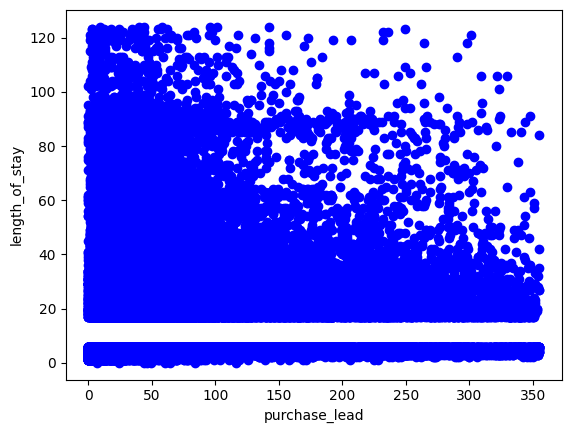

In [ ]:
plt.scatter(data_clus.iloc[:,0],data_clus.iloc[:,1],c='blue')
plt.xlabel('purchase_lead')
plt.ylabel('length_of_stay')
plt.show()

In [ ]:
clus_array = np.array(data_clus)
print(clus_array)

[[262  19]
 [112  20]
 [243  22]
 ...
 [ 24   6]
 [ 15   6]
 [ 19   6]]


In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(clus_array)
data_scaled

array([[0.73802817, 0.15322581],
       [0.31549296, 0.16129032],
       [0.68450704, 0.17741935],
       ...,
       [0.06760563, 0.0483871 ],
       [0.04225352, 0.0483871 ],
       [0.05352113, 0.0483871 ]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[0.14020278 0.55903522]
 [0.6077984  0.13494191]
 [0.12532813 0.10839218]]


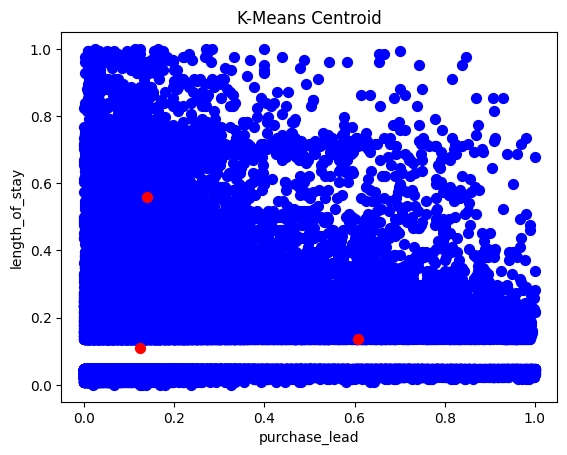

In [ ]:
# Buat model KMeans dengan 5 kluster
kmeanModel = KMeans(n_clusters=3, random_state=0)
kmeanModel.fit(data_scaled)

print(kmeanModel.cluster_centers_)

# Plot hasil kluster
plt.scatter(data_scaled[:,0], data_scaled[:,1], s=50, c='blue', marker='o', alpha=1)
centers = kmeanModel.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=50, alpha=1, marker='o')
plt.title('K-Means Centroid')
plt.xlabel('purchase_lead')
plt.ylabel('length_of_stay')
plt.show()

In [ ]:
y_kmeans = kmeanModel.predict(data_scaled)

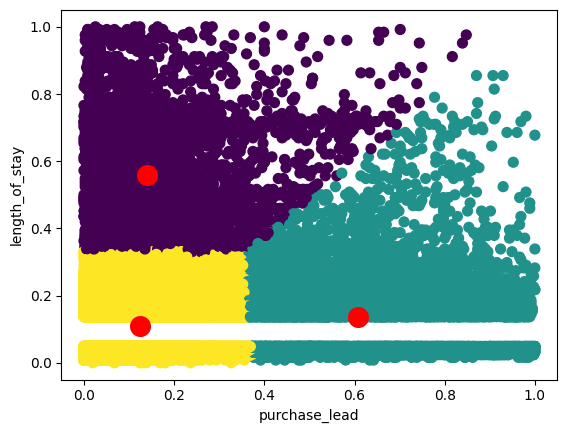

In [ ]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeanModel.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1);
plt.xlabel('purchase_lead')
plt.ylabel('length_of_stay')
plt.show()

In [ ]:
result = pd.DataFrame(data=y_kmeans)
result.columns = ['cluster']
result.head(10)

,cluster
0,1
1,2
2,1
3,2
4,2
5,0
6,1
7,1
8,2
9,1


In [ ]:
output = pd.concat([data, result], axis=1)
print(output.head())

   num_passengers  sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2              0          2            262              19   
1               1              0          2            112              20   
2               2              0          2            243              22   
3               1              0          2             96              31   
4               2              0          2             68              22   

   flight_hour  flight_day  route  booking_origin  wants_extra_baggage  \
0            7           2      0              61                    1   
1            3           2      0              61                    0   
2           17           6      0              36                    1   
3            4           2      0              61                    0   
4           15           6      0              36                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                  

In [ ]:
inertia = kmeanModel.inertia_
sil_score = silhouette_score(data_scaled, y_kmeans)

print(f'Inertia: {inertia}')
print(f'Silhouette Score: {sil_score}')

Inertia: 1157.4231588072312
Silhouette Score: 0.5559783213901152
